# 1.数据集

    安装TensorFlow 1.3.1 
    英文数据集通过imdb = keras.datasets.imdb下载。

# 2.IMDB数据集下载和探索

In [27]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0-alpha0


In [28]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data('C:/Users/user/.keras/datasets/imdb.npz',num_words=15000)

#### 查看数据维度：

In [29]:

print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


#### 查看此段文本中单词对应索引：

In [30]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### 将索引转换成对应单词：

In [31]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [32]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but marginally better than the <UNK> and the acting is wooden br br the infant <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

#### 准备数据：

In [33]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [34]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [35]:
print(train_data[0])

[    1    14    22    16    43   530   973  1622  1385    65   458  4468
    66  3941     4   173    36   256     5    25   100    43   838   112
    50   670     2     9    35   480   284     5   150     4   172   112
   167     2   336   385    39     4   172  4536  1111    17   546    38
    13   447     4   192    50    16     6   147  2025    19    14    22
     4  1920  4613   469     4    22    71    87    12    16    43   530
    38    76    15    13  1247     4    22    17   515    17    12    16
   626    18     2     5    62   386    12     8   316     8   106     5
     4  2223  5244    16   480    66  3785    33     4   130    12    16
    38   619     5    25   124    51    36   135    48    25  1415    33
     6    22    12   215    28    77    52     5    14   407    16    82
 10311     8     4   107   117  5952    15   256     4     2     7  3766
     5   723    36    71    43   530   476    26   400   317    46     7
     4 12118  1029    13   104    88     4   381   

#### 建立模型：

In [36]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 15000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
#model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          240000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 240,289
Trainable params: 240,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=tf.optimizers.Adam(),#tf.train.AdamOptimizer() =>tf.optimizers.Adam()
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

#### 训练模型

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 182us/sample - loss: 0.6927 - accuracy: 0.5360 - val_loss: 0.6920 - val_accuracy: 0.5965
Epoch 2/40
15000/15000 [==============================] - 1s 71us/sample - loss: 0.6907 - accuracy: 0.5947 - val_loss: 0.6891 - val_accuracy: 0.7244
Epoch 3/40
15000/15000 [==============================] - 1s 70us/sample - loss: 0.6856 - accuracy: 0.6719 - val_loss: 0.6815 - val_accuracy: 0.7548
Epoch 4/40
15000/15000 [==============================] - 1s 69us/sample - loss: 0.6737 - accuracy: 0.6969 - val_loss: 0.6669 - val_accuracy: 0.7152
Epoch 5/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.6550 - accuracy: 0.7220 - val_loss: 0.6436 - val_accuracy: 0.7580
Epoch 6/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.6257 - accuracy: 0.7501 - val_loss: 0.6118 - val_accuracy: 0.7965
Epoch 7/40
15000/15000 [==============================]

#### 评估模型:

In [40]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 0s 18us/sample - loss: 0.3136 - accuracy: 0.8767
[0.3136391270828247, 0.87668]


In [44]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

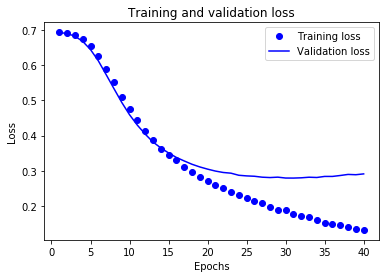

In [47]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

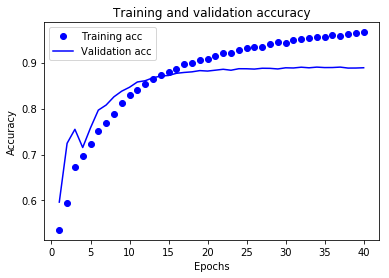

In [48]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 4.学习召回率、准确率、ROC曲线、AUC、PR曲线基本概念

# 混淆矩阵图：
![混淆矩阵](./混淆矩阵.jpg)

    TP: 预测为正，实际为正
    TN: 预测为负，实际为负
    FP:预测为正，实际为负
    FN: 预测为负，实际为正
    T/F：表示预测结果是否正确
    P/N：表示预测结果是正或负样本
    精确率、准确率：Accuracy=(TP+TN)/(TP+TN+FN+FP)
    精准率、查准率： P = TP/ (TP+FP)
    召回率、查全率： R = TP/ (TP+FN)
    真正例率(同召回率、查全率)：TPR = TP/ (TP+FN)
    假正例率：FPR =FP/ (FP+TN)
    
    ROC曲线和PR（Precision-Recall）曲线皆为类别不平衡问题中常用的评估方法。
    ROC曲线：
    横轴：表示负正类率（false positive rate FPR）特异程度，划分实例中所有负例站所有负例的比例
    纵轴：真正类率（true positive rate TPR）灵敏度
![ROC](./ROC.jpg)

    AUC曲线：AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。
![auc.jpg](./auc.jpg)

    在PR曲线中，以Recall为x轴，Precision为y轴。Recall与TPR的意思相同，而Precision指正确分类的正样本数占总正样本的比例。
![pr.jpg](./pr曲线.jpg)
    
    